<a href="https://colab.research.google.com/github/Gakori/autolibcar/blob/master/Gakori's_Core_IP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem statement
 investigate about a claim about the bluecars from the provided autolib dataset.

### Solution
identify areas and periods of interest via sampling stating the reason of choice of method. perform hypothesis testing with regards to the claim that we will have made.Areas of interest could be weekdays or weekends ie day_type or postalcodes.

In [179]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [180]:
#load the dataset
autolib = pd.read_csv('autolib_daily_events.csv')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [181]:
#checking info of the data
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [182]:
#shape of the dataset
autolib.shape

(16085, 13)

### DATA CLEANING

In [183]:
#checking for null values
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [184]:
#converting column names to lower case

# autolib_df.rename({'dayofweek': 'day_of_week'}, axis=1, inplace=True)
autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ','_')
autolib.columns
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [185]:
autolib.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


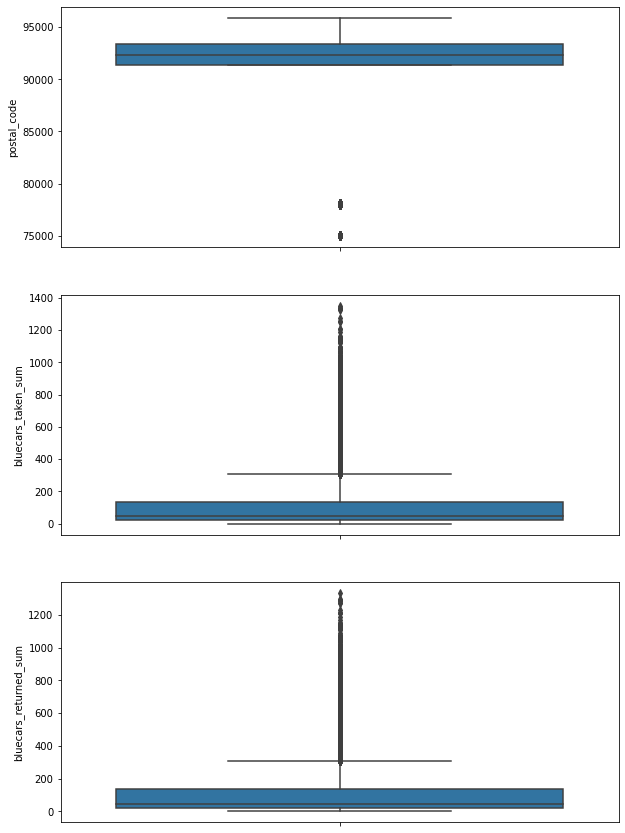

In [186]:
#checking and dealing with outliers(boxplots)
col_names = ['postal_code', 'bluecars_taken_sum','bluecars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=autolib[col_val], ax=ax[i])

plt.show()

from the above diagrams we can observe that our data contains so many outliers and we have to deal with them.This can be done by use of IQR Score

In [187]:
autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [188]:
#removing outliers using IQR score

Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
IQR = Q3 - Q1
autolib_df = autolib[~((autolib < (Q1 - 1.5 * IQR)) | (autolib > (Q3 + 1.5 * IQR))).any(axis=1)]
print(autolib)
print(autolib_df)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
3899         91330   1/1/2018  ...                4                2
3900   

In [106]:
#shape after dropping the outliers
autolib_df.shape

(9783, 13)

In [192]:
autolib_df.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
mean,93104.755188,1439.698457,2.979454,49.242870,49.222324,1.498518,1.494327,3.567106,3.568231,0.697434,0.694981
std,1012.235885,0.564981,2.074932,46.303795,46.223838,1.909304,1.891761,3.895220,3.898348,1.833390,1.828739
min,91330.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92270.000000,1440.000000,1.000000,17.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,93110.000000,1440.000000,3.000000,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,94100.000000,1440.000000,5.000000,67.000000,67.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000
max,95880.000000,1440.000000,6.000000,293.000000,301.000000,10.000000,10.000000,23.000000,23.000000,12.000000,12.000000


### UNIVARIATE ANALYSIS

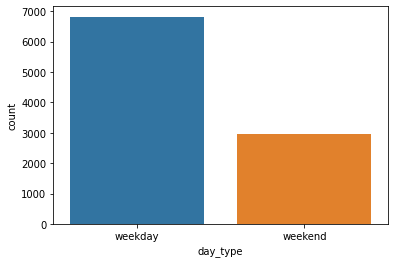

In [108]:
#day type
sns.countplot(autolib_df['day_type'])
#weekdays are busiest compared to weekends

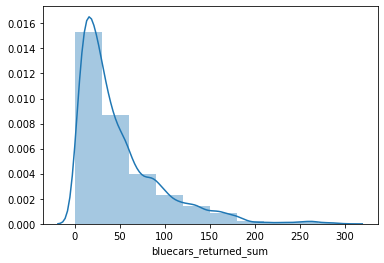

In [140]:

sns.distplot(autolib_df['bluecars_returned_sum'], bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d73abef98>]],
      dtype=object)

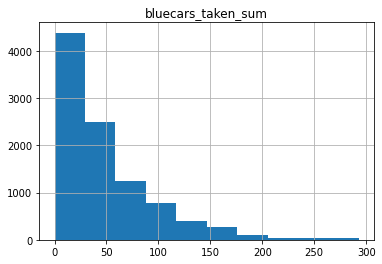

In [110]:
autolib_df.hist(column='bluecars_taken_sum')

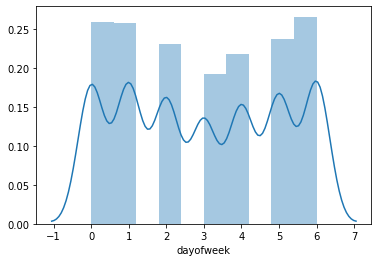

In [111]:
sns.distplot(autolib_df['dayofweek'], bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d7399f5c0>]],
      dtype=object)

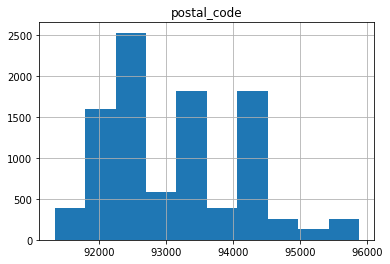

In [112]:
autolib_df.hist(column='postal_code')

In [193]:
#mean of the dataset
bluecars_taken_mean = autolib_df['bluecars_taken_sum'].mean()
blucars_returned_mean = autolib_df['bluecars_returned_sum'].mean()


print(bluecars_taken_mean)
print(blucars_returned_mean)

49.242870285188594
49.22232444035572


In [194]:
#pop std(sigma)
bluecars_taken_std = autolib_df['bluecars_taken_sum'].std()
blucars_returned_std = autolib_df['bluecars_returned_sum'].std()

print(bluecars_taken_std)
print(blucars_returned_std)

46.303794622721085
46.223837632122425


### BIVARIATE ANALYSIS

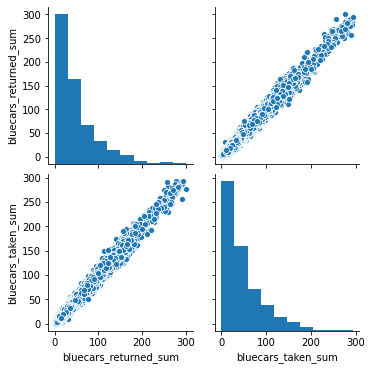

In [197]:
autolib_plot = autolib_df[['bluecars_returned_sum', 'bluecars_taken_sum']]
sns.pairplot(autolib_plot)
plt.show()

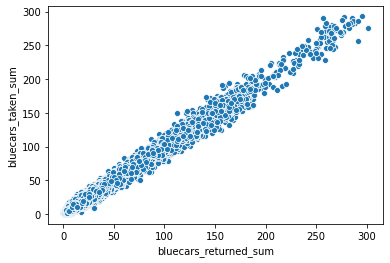

In [163]:
sns.scatterplot(autolib_df['bluecars_returned_sum'], autolib_df['bluecars_taken_sum'])

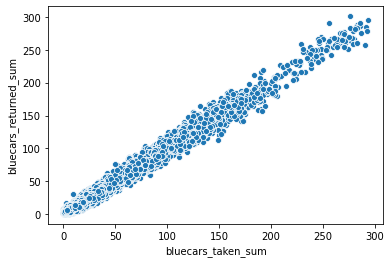

In [164]:
sns.scatterplot(autolib_df['bluecars_taken_sum'], autolib_df['bluecars_returned_sum'])

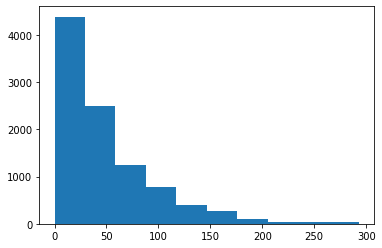

In [173]:
from matplotlib import pyplot
pyplot.hist(autolib_df['bluecars_taken_sum'])
pyplot.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(autolib_df['bluecars_taken_sum'], line='s')
pyplot.show()


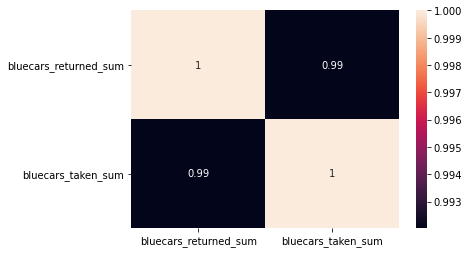

In [198]:
sns.heatmap(autolib_plot.corr(),annot=True)
plt.show()

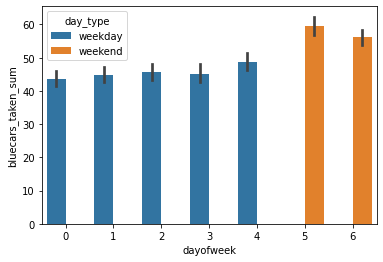

In [117]:
#creating subplots
sns.barplot(x='dayofweek', y='bluecars_taken_sum', hue='day_type', data=autolib_df)

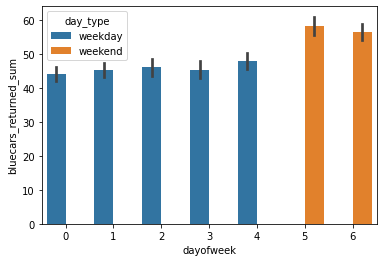

In [119]:

sns.barplot(x='dayofweek', y='bluecars_returned_sum', hue='day_type', data=autolib_df)

### SAMPLING

In [210]:
##sampling method
weekday = autolib_df[autolib_df['day_type'] == 'weekday']
weekday.head(100)
#dataset contains weekends only

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3906,91330,1/8/2018,1438,0,weekday,3,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,91370,1/9/2018,1439,1,weekday,13,16,0,0,0,0,0,0
4064,91370,1/10/2018,1440,2,weekday,11,14,1,1,1,1,0,0
4065,91370,1/11/2018,1440,3,weekday,11,12,0,0,0,0,0,0
4066,91370,1/12/2018,1439,4,weekday,14,13,0,0,0,0,0,0


In [272]:
mu=weekday['bluecars_taken_sum'].mean()
std=weekday['bluecars_taken_sum'].std()
print(mu)
print(std)

45.560557184750735
44.59061799374325


In [271]:
weekday_df=weekday.sample(n=100)
weekday_df

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
14556,94300,1/31/2018,1440,2,weekday,54,56,1,2,6,6,0,0
7272,92290,4/13/2018,1439,4,weekday,9,9,1,1,1,2,0,0
12806,93700,6/15/2018,1440,4,weekday,50,48,0,1,5,7,6,6
7687,92320,2/16/2018,1439,4,weekday,59,63,2,2,4,4,0,0
5000,92130,1/12/2018,1439,4,weekday,273,270,4,3,16,21,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,92700,6/14/2018,1439,3,weekday,99,119,3,5,11,7,0,0
13285,94110,1/8/2018,1438,0,weekday,39,33,0,0,4,1,0,0
6488,92230,4/9/2018,1440,0,weekday,51,63,0,2,5,5,0,0
14842,94410,1/5/2018,1440,4,weekday,34,34,0,0,1,0,0,0


In [279]:
sample_mean = weekday_df['bluecars_taken_sum'].mean()
sample_std = weekday_df['bluecars_taken_sum'].std()
print(sample_mean)
print(sample_std)

51.36
63.382360608955175


### HYPOTHESIS TESTING

In [ ]:
#identify the null and the alternative hypothesis
#steps

try to investigate on claim which is the number of bluecars taken is greater than the mean

steps in carrying out the test

1) state the claim mathematically(Ho and H1)

2) identify significance level

3) sketch a standerdized dist

4) calclulate test stat

5) calculate pvalue

6) make a decision 

7) interpret your decision in the context of the claim

In [124]:
#identifying the null and the alternative
#Ho: mu = 49.24
#H1: mu > 49.24

the method to be used for hypothesis will a zttest. this is because my pop mean is greater than 30 and the population std(sigma) is also provided. this is a one tailed test(right) because our alternative hypothesis has a greater sign.

we are trying to investigate the claim that states that the number of bluecars is greater than 50 on weekdays.

In [275]:
sample_mean = weekday_df['bluecars_taken_sum'].mean()
sample_mean

51.36

In [276]:
sample_std = weekday_df['bluecars_taken_sum'].std()
sample_std

63.382360608955175

In [282]:
#identify the significance level, mean and std
alpha = 0.05
pop_mean = 49.24
pop_std = 46.30
sample_mean = 51.36
sample_std = 63.38
n=100

In [283]:
#calculate the zscore, test stat
zscore = (sample_mean - pop_mean) / pop_std
print(zscore)

#calculate the pvalue
from scipy.stats import norm
prob = norm.cdf(zscore)
print(prob)

#critical_val at 0.05 significance level is 1.645
#pvalue which is 0.52 is greater than significance level which is 0.05 we therefore fail to reject the null hypothesis
#we coclude that there is not sufficient evidence to support a conclusion that the pop mean is > than 49.24

0.04578833693304531
0.5182605225795728


In [ ]:
#using critaical values
#at 0.05 significance level the critial value is z=1.645
#we therefore fail to reject the null hypothesis

In [286]:
#point estimate and confidence interval
estimate = population_mean - sample_mean
estimate

-2.1171000000000006

In [284]:
#confidence interval
#finding standard error of the mean data
std_error = pop_mean / np.sqrt(n)
std_error

#calculate 95% confidence interval
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)
#we are 95% confident that the population mean is bettween 41.71 to 61.01

(41.70913734012477, 61.01086265987523)

In [ ]:
qqplot(weekend['bluecars_taken_sum'], line='s')
pyplot.show()